In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [45]:

df = pd.read_csv("application_record.csv")

In [46]:
def bar_plot(df, column):
    # Create a count plot (bar plot) for the specified column in the DataFrame
    sns.countplot(data=df, x=column)
    
    # Add the x-axis label with the column name
    plt.xlabel(column)
    
    # Add the y-axis label with 'Count'
    plt.ylabel("Count")
    
    # Display the plot
    plt.show()

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [49]:
if 'CODE_GENDER' in df.columns:
    df = pd.get_dummies(df, columns=['CODE_GENDER'], prefix='CODE_GENDER')
else:
    print("La columna 'CODE_GENDER' no está en el DataFrame.")

# cambiamos el tipo de dato de CNT_FAM_MEMBERS y AMT_INCOME_TOTAL a int
df = df.astype({'CNT_FAM_MEMBERS': 'int', 'AMT_INCOME_TOTAL': 'int'})

In [50]:
df.isnull().sum()


ID                          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
CODE_GENDER_F               0
CODE_GENDER_M               0
dtype: int64

In [51]:
df.isnull().sum()

ID                          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
CODE_GENDER_F               0
CODE_GENDER_M               0
dtype: int64

In [52]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CODE_GENDER_F          0
CODE_GENDER_M          0
dtype: int64

In [53]:
print(df['OCCUPATION_TYPE'].value_counts())

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


In [54]:
occupation_mapping = {
    'Laborers': 1,
    'Core staff': 2,
    'Sales staff': 3,
    'Managers': 4,
    'Drivers': 5,
    'High skill tech staff': 6,
    'Accountants': 7,
    'Medicine staff': 8,
    'Cooking staff': 9,
    'Security staff': 10,
    'Cleaning staff': 11,
    'Private service staff': 12,
    'Low-skill Laborers': 13,
    'Secretaries': 14,
    'Waiters/barmen staff': 15,
    'Realty agents': 16,
    'HR staff': 17,
    'IT staff': 18
}

# Crear la columna numérica
df['OCCUPATION_TYPE_INT'] = df['OCCUPATION_TYPE'].map(occupation_mapping)

df = df.drop(columns=['NAME_INCOME_TYPE', 'OCCUPATION_TYPE'])

In [55]:
print(df['NAME_EDUCATION_TYPE'].value_counts())

NAME_EDUCATION_TYPE
Secondary / secondary special    204792
Higher education                  85663
Incomplete higher                 11635
Lower secondary                    2039
Academic degree                     225
Name: count, dtype: int64


In [56]:
education_mapping = {
    'Secondary / secondary special': 1,
    'Higher education': 2,
    'Incomplete higher': 3,
    'Lower secondary': 4,
    'Academic degree': 5

}

# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_EDUCATION_TYPE_INT'] = df['NAME_EDUCATION_TYPE'].map(education_mapping)

# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_EDUCATION_TYPE'])

In [57]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT
2,5008806,Y,Y,0,112500,Married,House / apartment,-21474,-1134,1,0,0,0,2,False,True,10,1
3,5008808,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
4,5008809,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
5,5008810,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
6,5008811,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1


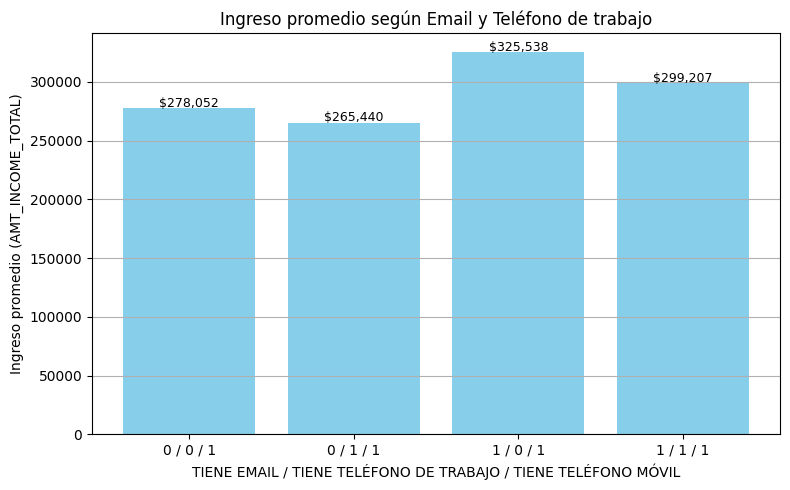

In [58]:
# Filtrar solo "Commercial associate" si lo deseas
subset = df[df.OCCUPATION_TYPE_INT == 4]

# Agrupar por FLAG_EMAIL y FLAG_WORK_PHONE y calcular ingreso promedio y conteo
income_stats = subset.groupby(['FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_MOBIL'])['AMT_INCOME_TOTAL'].agg(['mean', 'count']).reset_index()

# Crear una columna combinada para graficar
income_stats['combo'] = income_stats['FLAG_EMAIL'].astype(str) + ' / ' + income_stats['FLAG_WORK_PHONE'].astype(str) + ' / ' + income_stats['FLAG_MOBIL'].astype(str)

# Graficar ingreso promedio por combinación
plt.figure(figsize=(8, 5))
plt.bar(income_stats['combo'], income_stats['mean'], color='skyblue')

# Opcional: mostrar cantidad sobre cada barra
for i, val in enumerate(income_stats['mean']):
    plt.text(i, val + 1000, f"${val:,.0f}", ha='center', fontsize=9)

plt.title('Ingreso promedio según Email y Teléfono de trabajo')
plt.xlabel('TIENE EMAIL / TIENE TELÉFONO DE TRABAJO / TIENE TELÉFONO MÓVIL')
plt.ylabel('Ingreso promedio (AMT_INCOME_TOTAL)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Utilizamos la ocupacion laboradores para poder verificar, que personas tienen correo, telefono personal yy de trabajo para poder contactar con ellos

<Axes: >

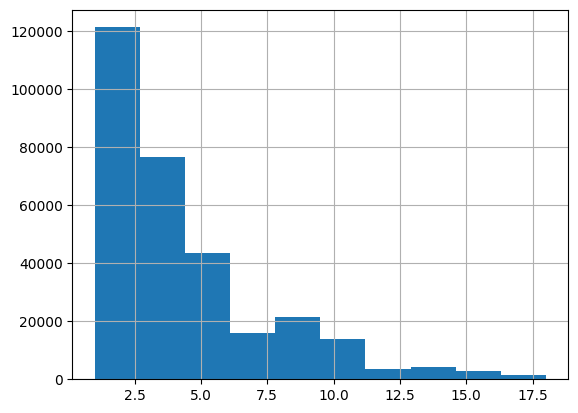

In [59]:
df['OCCUPATION_TYPE_INT'].hist()

In [60]:
print(df['NAME_FAMILY_STATUS'].value_counts())

NAME_FAMILY_STATUS
Married                 212721
Single / not married     39649
Civil marriage           26802
Separated                18470
Widow                     6712
Name: count, dtype: int64


In [61]:
family_status_mapping = {
    'Married': 1,
    'Single / not married': 2,
    'Civil marriage': 3,
    'Widow': 4,
    'Separated': 5
}
# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_FAMILY_STATUS_INT'] = df['NAME_FAMILY_STATUS'].map(family_status_mapping)
# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_FAMILY_STATUS'])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT
2,5008806,Y,Y,0,112500,House / apartment,-21474,-1134,1,0,0,0,2,False,True,10,1,1
3,5008808,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
4,5008809,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
5,5008810,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
6,5008811,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2


In [62]:
print(df['NAME_HOUSING_TYPE'].value_counts())

NAME_HOUSING_TYPE
House / apartment      270017
With parents            15641
Municipal apartment      9663
Rented apartment         4819
Office apartment         3006
Co-op apartment          1208
Name: count, dtype: int64


In [63]:
housing_mapping = {
    'House / apartment': 1,
    'With parents': 2,
    'Municipal apartment': 3,
    'Rented apartment': 4,
    'Office apartment': 5,
    'Co-op apartment': 6
}
# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_HOUSING_TYPE_INT'] = df['NAME_HOUSING_TYPE'].map(housing_mapping)
# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_HOUSING_TYPE'])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT
2,5008806,Y,Y,0,112500,-21474,-1134,1,0,0,0,2,False,True,10,1,1,1
3,5008808,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
4,5008809,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
5,5008810,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
6,5008811,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1


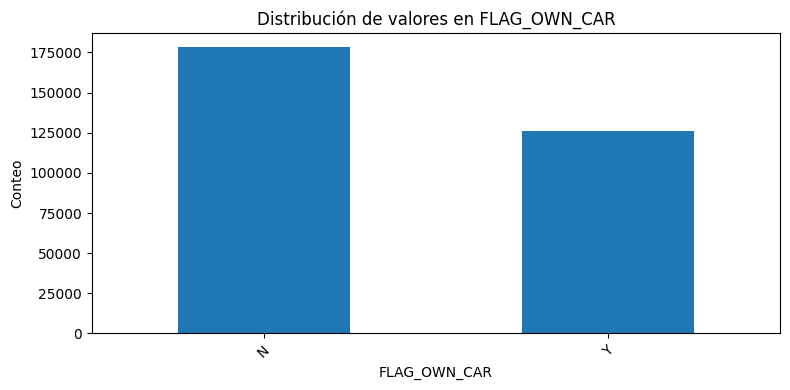

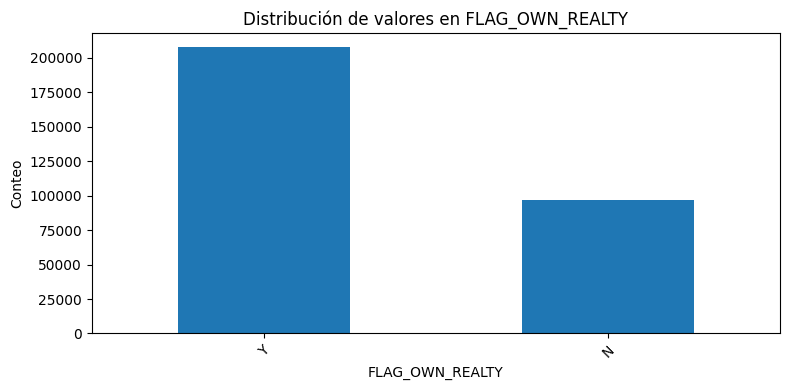

In [64]:
object_cols = df.select_dtypes(include=['object']).columns

# Recorrer cada columna de tipo object
for col in object_cols:
    plt.figure(figsize=(8, 4))  # Opcional: tamaño del gráfico
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Opcional: rotar etiquetas si son largas
    plt.tight_layout()
    plt.show()

In [65]:
df["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     192856
1      73130
2      33512
3       4311
4        401
5        122
7          9
9          5
12         4
14         3
19         1
Name: count, dtype: int64

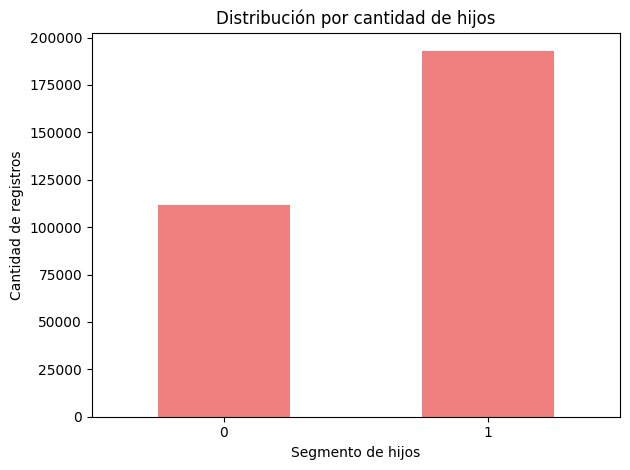

In [66]:
df = df[df['CNT_CHILDREN'].notnull()]

# Dividir la columna 'CNT_CHILDREN' en 2 segmentos: 'Tiene hijos' y 'No tiene hijos'
df['HAVE_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x:1 if x == 0 else 0)

# Contar cuántos registros hay en cada grupo
segmentos = df['HAVE_CHILDREN'].value_counts().sort_index()

#elimina la columna hijos, y deja dos columnas simplificadas
df = df.drop(columns=['CNT_CHILDREN'])


# Graficar
segmentos.plot(kind='bar', color='lightcoral')
plt.title('Distribución por cantidad de hijos')
plt.xlabel('Segmento de hijos')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [67]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN
2,5008806,Y,Y,112500,-21474,-1134,1,0,0,0,2,False,True,10,1,1,1,1
3,5008808,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,1
4,5008809,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,1
5,5008810,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,1
6,5008811,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,1


In [68]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs() # Convertir los valores negativos a positivos

# Mostrar el resultado
print(df['DAYS_BIRTH'].head())

2    21474
3    19110
4    19110
5    19110
6    19110
Name: DAYS_BIRTH, dtype: int64


In [69]:
# Usando 365.2425 días por año (más preciso)
df['AGE_YEARS'] = round(df['DAYS_BIRTH'].abs() / 365.2425, 1)
# Usando 365.2425 días por año (más preciso)
df['AGE_EMPLOYED'] = round(df['DAYS_EMPLOYED'].abs() / 365.2425, 1)

df = df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [70]:
print(df.columns)

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'OCCUPATION_TYPE_INT', 'NAME_EDUCATION_TYPE_INT',
       'NAME_FAMILY_STATUS_INT', 'NAME_HOUSING_TYPE_INT', 'HAVE_CHILDREN',
       'AGE_YEARS', 'AGE_EMPLOYED'],
      dtype='object')


In [71]:
df.dtypes

ID                           int64
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
AMT_INCOME_TOTAL             int64
FLAG_MOBIL                   int64
FLAG_WORK_PHONE              int64
FLAG_PHONE                   int64
FLAG_EMAIL                   int64
CNT_FAM_MEMBERS              int64
CODE_GENDER_F                 bool
CODE_GENDER_M                 bool
OCCUPATION_TYPE_INT          int64
NAME_EDUCATION_TYPE_INT      int64
NAME_FAMILY_STATUS_INT       int64
NAME_HOUSING_TYPE_INT        int64
HAVE_CHILDREN                int64
AGE_YEARS                  float64
AGE_EMPLOYED               float64
dtype: object

Ahora realizaremos la escala para poder obtener la caja negra, y poder manejar los datos mejor 

In [72]:
map_flags = {
    'Y': 1, 'YES': 1, '1': 1,
    'N': 0, 'NO': 0, '0': 0
}

#columnas a convertir a tipo binario'
cols_convert = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in cols_convert:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.upper()
        .map(map_flags)
        .fillna(0)
        .astype(int)
    )

df['CODE_GENDER_F'] = df['CODE_GENDER_F'].astype(int)
df['CODE_GENDER_M'] = df['CODE_GENDER_M'].astype(int)

In [73]:
# from sklearn.preprocessing import MinMaxScaler

# escalador = MinMaxScaler()
# df['AMT_INCOME_TOTAL'] = escalador.fit_transform(df[['AMT_INCOME_TOTAL']])

<Axes: >

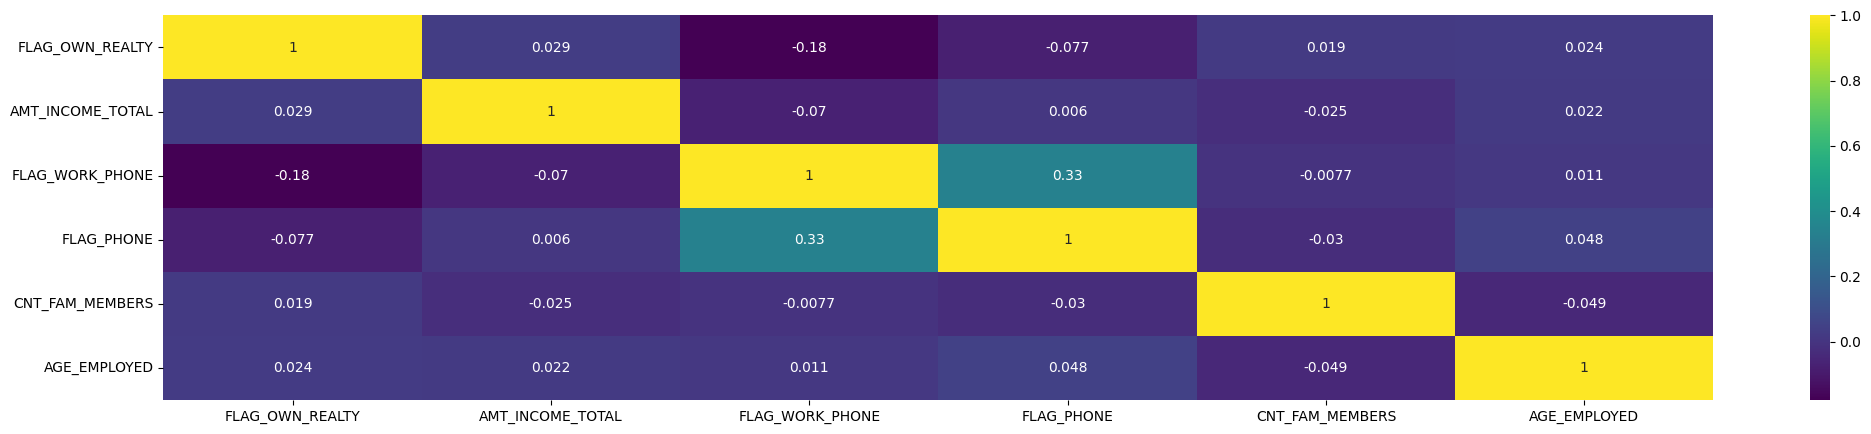

In [74]:
# Primero elimina columnas del DataFrame original
columnas_a_eliminar = [
    'ID', 'FLAG_OWN_CAR', 'HAVE_CHILDREN', 'NAME_FAMILY_STATUS_INT', 'CODE_GENDER_F', 'CODE_GENDER_M',
    'DAYS_BIRTH', 'AGE_YEARS', 'OCCUPATION_TYPE_INT', 'NAME_HOUSING_TYPE_INT', 'NAME_EDUCATION_TYPE_INT', 'FLAG_MOBIL', 'FLAG_EMAIL'
]

df_filtrado = df.drop(columns=columnas_a_eliminar, errors='ignore')  # 'ignore' evita error si faltan columnas
df_filtrado = df_filtrado.select_dtypes(include=['int64', 'float64'])  # ahora sí, solo numéricas

# Graficar matriz de correlación
plt.figure(figsize=(25, 5))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="viridis")

In [75]:
df['FLAG_MOBIL'].value_counts()
# esta la descartamos del heatmap porque todos tienen movil, entonces no aporta nada
df = df.drop(columns=['FLAG_MOBIL'])
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN,AGE_YEARS,AGE_EMPLOYED
2,5008806,1,1,112500,0,0,0,2,0,1,10,1,1,1,1,58.8,3.1
3,5008808,0,1,270000,0,1,1,1,1,0,3,1,2,1,1,52.3,8.4
4,5008809,0,1,270000,0,1,1,1,1,0,3,1,2,1,1,52.3,8.4
5,5008810,0,1,270000,0,1,1,1,1,0,3,1,2,1,1,52.3,8.4
6,5008811,0,1,270000,0,1,1,1,1,0,3,1,2,1,1,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,0,1,202500,1,0,0,2,0,1,1,2,3,1,1,37.0,6.3
438548,6839936,1,1,135000,0,0,0,3,0,1,1,1,1,1,0,34.4,5.7
438553,6840222,0,0,103500,0,0,0,1,1,0,1,1,2,1,1,43.6,8.2
438554,6841878,0,0,54000,1,0,0,1,1,0,3,2,2,2,1,22.4,1.0


Ahora que tenemos todo listo, crearemos dos arboles para dar comparacion a los datos, con AMT escalado, para ver los resultados

In [76]:
df['puntaje_credito'] = (
    df['AMT_INCOME_TOTAL'] * 2 +
    df['FLAG_OWN_REALTY'].astype(int) * 1.5 +
    df['FLAG_PHONE'].astype(int) * 1.5 +
    (df['AGE_EMPLOYED'] >= 2).astype(int) * 1.5 +
    df['AGE_YEARS'].apply(lambda x: 1 if 25 <= x <= 55 else 0) * 1 +
    df['NAME_EDUCATION_TYPE_INT'].isin([0, 1, 2]).astype(int) * 1 +
    (df['CNT_FAM_MEMBERS'] <= 5).astype(int) * 1 +
    df['NAME_FAMILY_STATUS_INT'].isin([0, 1, 2, 3]).astype(int) * 1
)
df['estado_credito'] = df['puntaje_credito'].apply(lambda x: 1 if x >= 7 else 0)



In [77]:
df['estado_credito'].value_counts()

estado_credito
1    304354
Name: count, dtype: int64

In [78]:
X = df[['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
        'NAME_EDUCATION_TYPE_INT','AGE_EMPLOYED']]
Y=df["estado_credito"]

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [82]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 100.00%


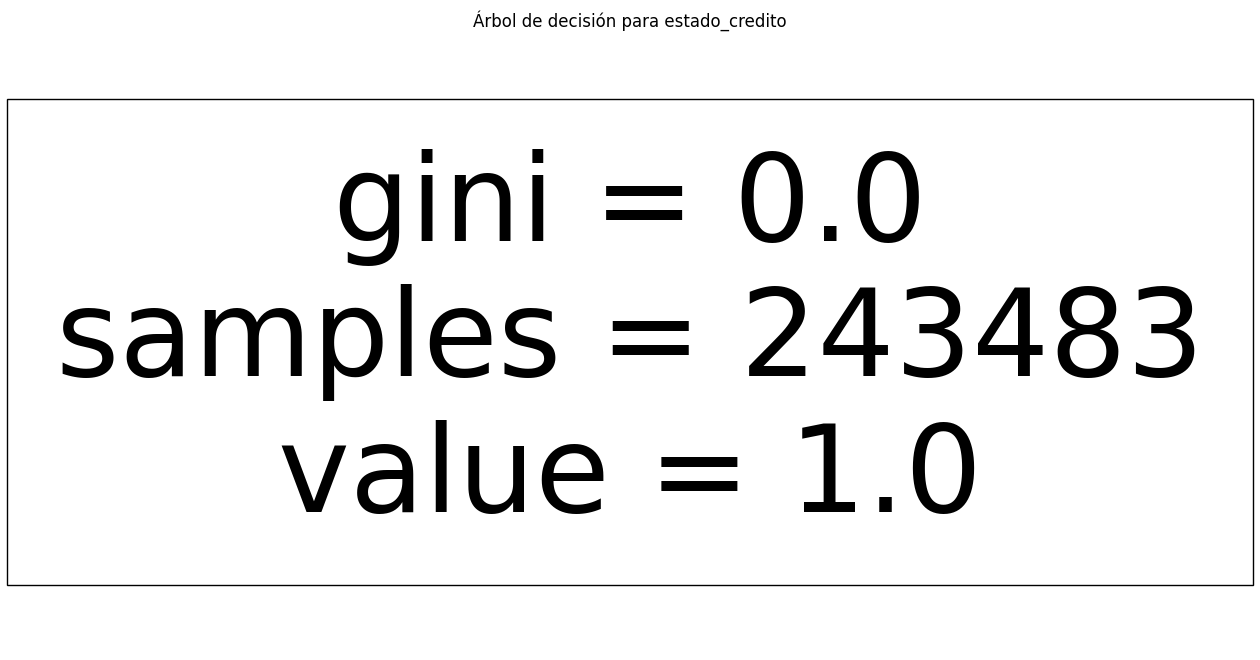

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"], filled=True)
plt.title("Árbol de decisión para estado_credito")
plt.show()

In [84]:
x_train.shape, x_test.shape

((243483, 5), (60871, 5))

In [85]:
from sklearn.discriminant_analysis import StandardScaler


escala = StandardScaler()
x_train = escala.fit_transform(x_train)
x_test = escala.transform(x_test)

In [86]:
import sklearn


RGL = sklearn.linear_model.LogisticRegression(class_weight = 'balanced')
RGL.fit(x_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = RGL.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[13471,  7254],
       [ 4785, 35361]])

Text(95.72222222222221, 0.5, 'Real')

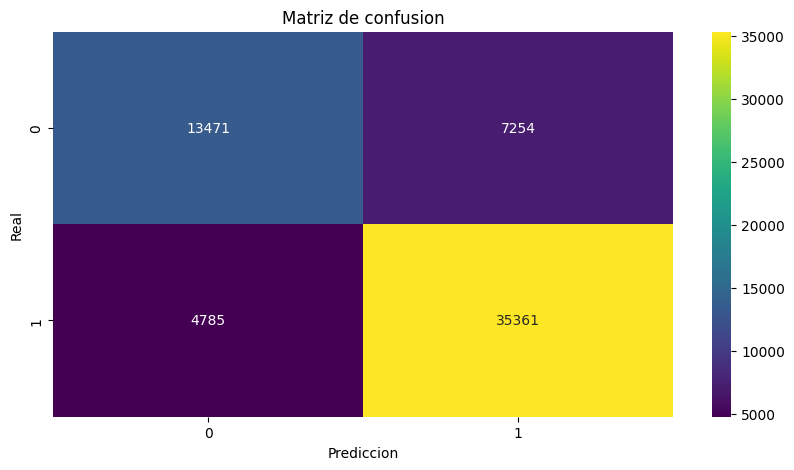

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap="viridis", fmt="d")
plt.title("Matriz de confusion")
plt.xlabel("Prediccion")
plt.ylabel("Real")

	•	Hay muchos más verdaderos positivos (17,115) que falsos negativos (3,548).
	•	El modelo también evita muchos falsos positivos (solo 6,110 frente a más de 34,000 TN).
	•	El número total de errores (FN + FP = 9,658) es bajo comparado con el total.

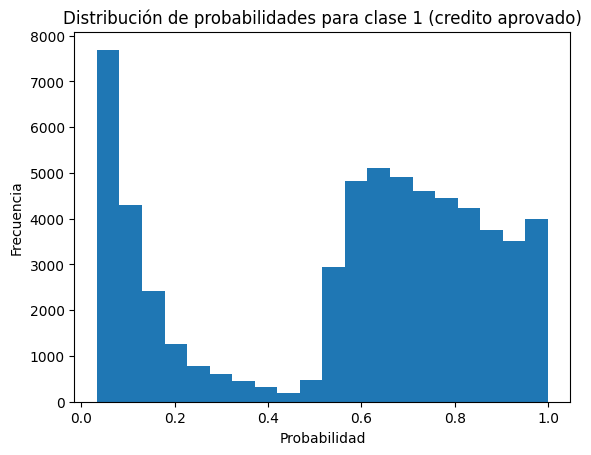

In [ ]:
df['estado_credito'].value_counts(normalize=True)
y_proba = RGL.predict_proba(x_test)
y_proba
plt.hist(y_proba[:,1], bins=20)
plt.title("Distribución de probabilidades para clase 1 (credito aprovado)")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(RGL, method='sigmoid')  # o 'isotonic'
calibrated_model.fit(x_train, y_train)

CalibratedClassifierCV(estimator=LogisticRegression(class_weight='balanced'))

In [ ]:
y_proba_calibrated = calibrated_model.predict_proba(x_test)
y_proba_calibrated

array([[0.90236541, 0.09763459],
       [0.0500118 , 0.9499882 ],
       [0.80998316, 0.19001684],
       ...,
       [0.10084173, 0.89915827],
       [0.19573885, 0.80426115],
       [0.04687396, 0.95312604]], shape=(60871, 2))

In [ ]:

y_proba_original = RGL.predict_proba(x_test)
y_proba_original

array([[0.95573087, 0.04426913],
       [0.08239573, 0.91760427],
       [0.90474157, 0.09525843],
       ...,
       [0.16687848, 0.83312152],
       [0.3130066 , 0.6869934 ],
       [0.07709966, 0.92290034]], shape=(60871, 2))

In [ ]:
#  probabilidades de clase 1
y_proba_original = RGL.predict_proba(x_test)[:, 1]
y_proba_calibrated = calibrated_model.predict_proba(x_test)[:, 1]

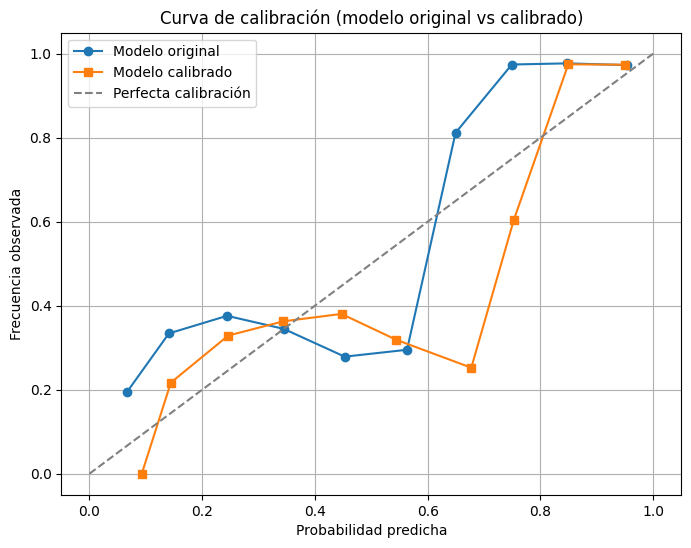

In [ ]:
from sklearn.calibration import calibration_curve
# Curvas de calibración
prob_true_orig, prob_pred_orig = calibration_curve(y_test, y_proba_original, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='Modelo original')
plt.plot(prob_pred_cal, prob_true_cal, marker='s', label='Modelo calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfecta calibración')

plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia observada')
plt.title('Curva de calibración (modelo original vs calibrado)')
plt.legend()
plt.grid()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_037 = (y_proba_calibrated >= 0.37).astype(int)
precision = precision_score(y_test, y_pred_037)
recall = recall_score(y_test, y_pred_037)
f1 = f1_score(y_test, y_pred_037)
matriz = confusion_matrix(y_test, y_pred_037)

print(f"✅ Umbral aplicado: 0.37")
print(f"✔️ Precisión: {precision:.4f}")
print(f"✔️ Recall: {recall:.4f}")
print(f"✔️ F1-score: {f1:.4f}")
print("🧾 Matriz de Confusión:")
print(matriz)

# Reporte completo
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_037))

✅ Umbral aplicado: 0.37
✔️ Precisión: 0.8001
✔️ Recall: 0.9047
✔️ F1-score: 0.8492
🧾 Matriz de Confusión:
[[11648  9077]
 [ 3824 36322]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64     20725
           1       0.80      0.90      0.85     40146

    accuracy                           0.79     60871
   macro avg       0.78      0.73      0.75     60871
weighted avg       0.78      0.79      0.78     60871



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Calcular las curvas
train_sizes, train_scores, val_scores = learning_curve(
    estimator=RGL,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 valores de tamaño
    cv=cv,
    scoring='accuracy',  # puedes cambiar a 'f1', 'roc_auc', etc.
    n_jobs=-1
)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

In [ ]:
train_scores_mean

array([0.80456926, 0.8041995 , 0.80341918, 0.80268501, 0.8031337 ,
       0.80341744, 0.80303484, 0.80264651, 0.80227715, 0.80245398])

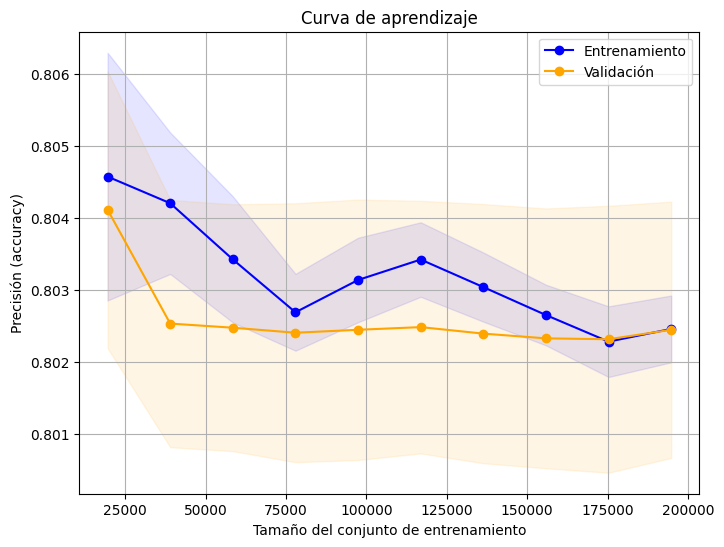

In [ ]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_scores_mean, 'o-', label="Validación", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")

plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión (accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

1.	Convergencia entre entrenamiento y validación:
	•	Las líneas azul (entrenamiento) y naranja (validación) se acercan progresivamente conforme aumenta el tamaño del conjunto de entrenamiento.
	•	Esto es señal de que el modelo generaliza bien y no está sobreajustando (overfitting).
	2.	Estabilidad en la precisión:
	•	Ambas líneas se mantienen alrededor de 0.841 de accuracy, lo cual es estable y consistente.
	•	No hay grandes caídas en rendimiento a medida que se incrementa el número de muestras.
	3.	Banda de confianza (sombreado) razonable:
	•	Aunque hay algo de variabilidad, la banda no es caótica. Es esperable cierto ruido estadístico.

⸻

Puntos a seguir observando:
	•	La precisión no mejora significativamente al añadir más datos después de cierto punto (~125,000).
	•	👉 Esto sugiere que podrías estar llegando al límite de lo que el modelo puede aprender con las variables actuales.
	•	Si el objetivo es aumentar precisión, podrías considerar:
	•	Ingeniería de características (crear nuevas variables).
	•	Modelos más complejos o ajustes de hiperparámetros.
	•	Reducción de ruido en los datos.

⸻

Conclusión

	•	Generaliza bien
	•	No está sobreajustando
	•	Se beneficia al menos parcialmente del aumento de datos

In [ ]:
from sklearn.metrics import precision_score

# Predicciones con umbral 0.5
y_pred_05 = (y_proba_calibrated >= 0.5).astype(int)

# Calcular precisión
precision = precision_score(y_test, y_pred_05)
print(f"🔍 Precisión con umbral 0.46: {precision:.4f}")

🔍 Precisión con umbral 0.46: 0.8162


Ahora probaremos el modelo de lightgbm, para ver que diferencias se encuentran y cual puede resultar mas efectivo para nuestro caso especifico, y asi hacer las comparaciones respectivas y poder dar una conclusion


Decidimos escoger este modelo, por lo eficiente que es, y su soporte para mayor cantidad de datos, como sucede en este caso

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Árbol base
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 161064, number of negative: 82419
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 243483, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.661500 -> initscore=0.669986
[LightGBM] [Info] Start training from score 0.669986


LGBMClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgb_model, X, Y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {scores.mean():.4f}")

[LightGBM] [Info] Number of positive: 160968, number of negative: 82515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 243483, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.661106 -> initscore=0.668225
[LightGBM] [Info] Start training from score 0.668225
[LightGBM] [Info] Number of positive: 160968, number of negative: 82515
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 243483, number of used features: 5
[LightGBM] [Info] [b

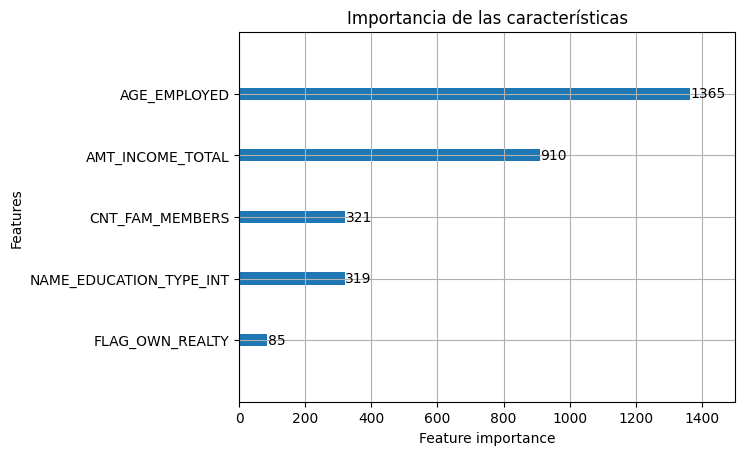

In [ ]:
import matplotlib.pyplot as plt

lgb.plot_importance(lgb_model, max_num_features=10)
plt.title("Importancia de las características")
plt.show()

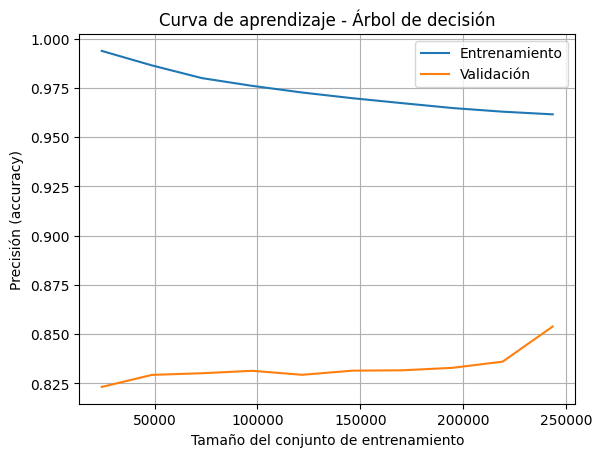

[LightGBM] [Info] Number of positive: 15447, number of negative: 8901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 24348, number of used features: 5
[LightGBM] [Info] Number of positive: 31382, number of negative: 17314
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634426 -> initscore=0.551251
[LightGBM] [Info] Start training from score 0.551251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 48696, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644447 -> initscore=0.594719
[LightGBM] [Info] Start training from score 0.594719
[LightGBM] [Info] Num

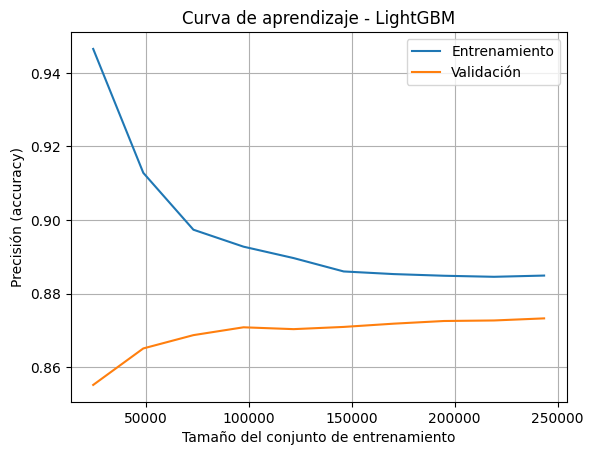

In [ ]:
def plot_learning(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, Y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label="Entrenamiento")
    plt.plot(train_sizes, val_mean, label="Validación")
    plt.title(f"Curva de aprendizaje - {title}")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión (accuracy)")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning(tree, "Árbol de decisión")
plot_learning(lgb_model, "LightGBM")

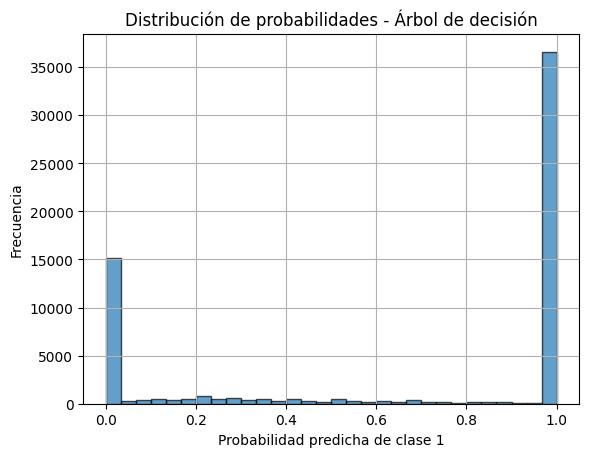

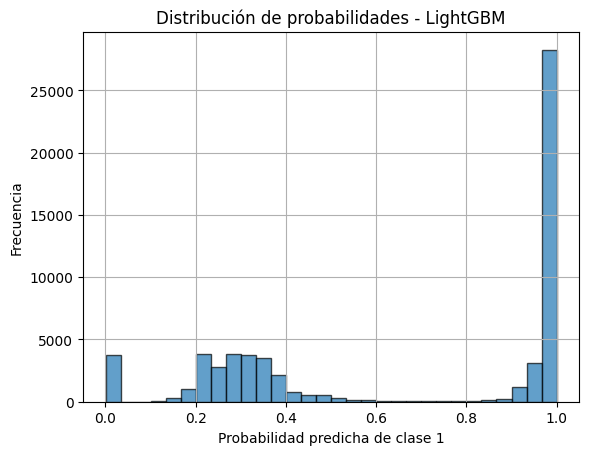

In [ ]:
def plot_probability_distribution(model, title):
    y_proba = model.predict_proba(X_test)[:, 1]
    plt.hist(y_proba, bins=30, edgecolor="k", alpha=0.7)
    plt.title(f"Distribución de probabilidades - {title}")
    plt.xlabel("Probabilidad predicha de clase 1")
    plt.ylabel("Frecuencia")
    plt.grid()
    plt.show()

plot_probability_distribution(tree, "Árbol de decisión")
plot_probability_distribution(lgb_model, "LightGBM")

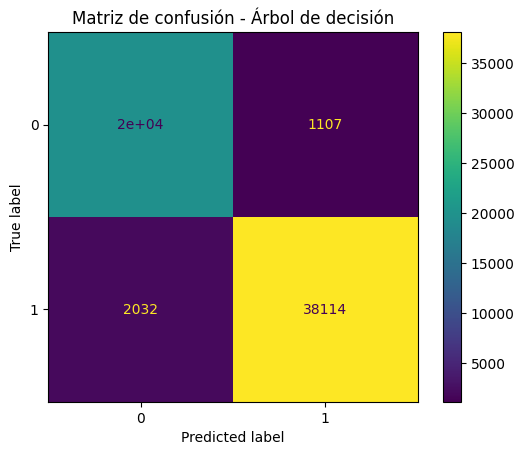

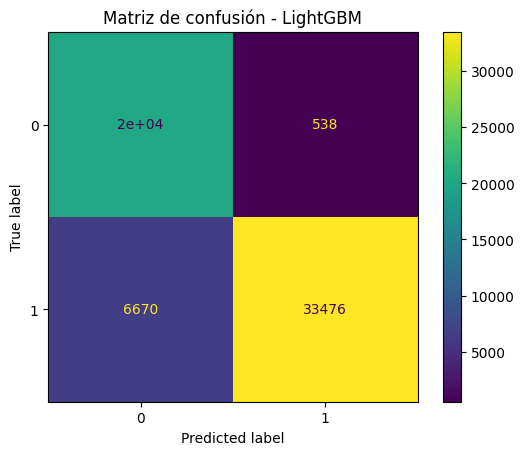

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_conf_matrix(model, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Matriz de confusión - {title}")
    plt.show()

plot_conf_matrix(tree, "Árbol de decisión")
plot_conf_matrix(lgb_model, "LightGBM")

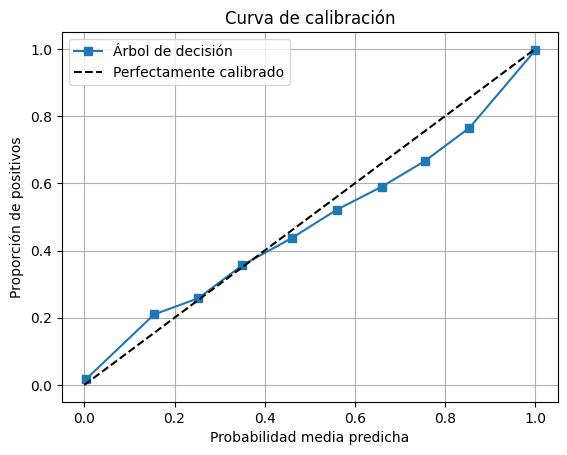

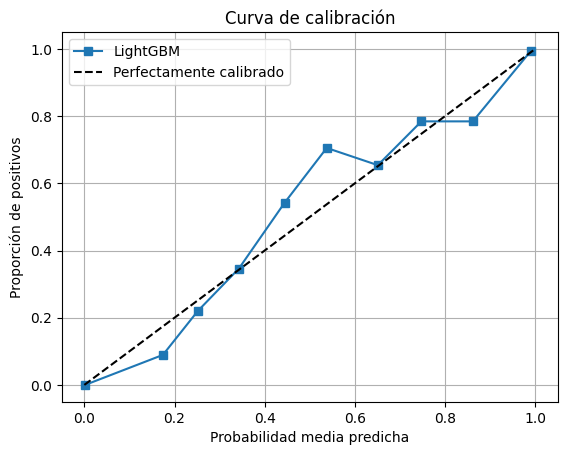

In [ ]:
def plot_calibration(model, title):
    prob_pos = model.predict_proba(X_test)[:, 1]
    frac_pos, mean_pred = calibration_curve(y_test, prob_pos, n_bins=10)

    plt.plot(mean_pred, frac_pos, "s-", label=f"{title}")
    plt.plot([0, 1], [0, 1], "k--", label="Perfectamente calibrado")
    plt.xlabel("Probabilidad media predicha")
    plt.ylabel("Proporción de positivos")
    plt.title("Curva de calibración")
    plt.legend()
    plt.grid()
    plt.show()

plot_calibration(tree, "Árbol de decisión")
plot_calibration(lgb_model, "LightGBM")

In [ ]:
print(df.columns)

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'OCCUPATION_TYPE_INT',
       'NAME_EDUCATION_TYPE_INT', 'NAME_FAMILY_STATUS_INT',
       'NAME_HOUSING_TYPE_INT', 'HAVE_CHILDREN', 'AGE_YEARS', 'AGE_EMPLOYED',
       'puntaje_credito', 'estado_credito'],
      dtype='object')
